# 钻石价格预测 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [138]:
diamonds=pd.read_csv('diamonds_dataset.csv')
diamonds=diamonds[['shape','price','carat','cut','color','clarity','report','type']]
diamonds

,shape,price,carat,cut,color,clarity,report,type
0,Round,400,0.30,Very Good,J,SI2,GIA,natural
1,Emerald,400,0.31,Ideal,I,SI1,GIA,natural
2,Emerald,400,0.30,Ideal,I,VS2,GIA,natural
3,Round,400,0.30,Ideal,I,SI2,GIA,natural
4,Emerald,400,0.30,Ideal,I,SI1,GIA,natural
...,...,...,...,...,...,...,...,...
119302,Round,99040,5.71,Super Ideal,D,VVS2,GCAL,lab
119303,Cushion,107330,15.32,Very Good,G,SI2,IGI,lab
119304,Cushion,110110,10.05,Ideal,D,SI2,IGI,lab
119305,Oval,126030,10.33,Fair,D,VS2,IGI,lab


In [4]:
diamonds[diamonds.isnull().values==True]#数据集中没有缺失数据

,shape,price,carat,cut,color,clarity,report,type


### 数据可视化

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
class Dplot:
    def __init__(self, df):
        '''
        param df : original dataset 
        '''
        self.df = df
        
    #绘制箱线图
    def Dboxplot(self,feature):
        #由于可能存在离群点，先认为删去部分点
        df_new = self.df[self.df.price<20000]
        #设置元素的缩放比例，调整图标元素的大小
        sns.set_context(rc={'axes.labelsize':15,'legend.fontsize':13,'xtick.labelsize':10,'ytick.labelsize':13})
        #设置图标的大小与分辨率
        fig = plt.figure(figsize=(7,4), dpi=100)
        sns.boxplot(x=df_new[feature], y=df_new['price'])
        
    #绘制散点图
    def Dscatter(self,feature):
        self.df.plot.scatter(x=feature,y='price',color='cyan')
       
    #绘制柱形图 
    def Dbar(self,feature1,feature2):
        sns.countplot(self.df[feature1],palette='summer_r',hue=self.df[feature2])
        
    #绘制拟合直线
    def Dlmshow(self,feature1,feature2):
        #设置元素的缩放比例，调整图表元素的大小
        sns.set_context(rc={'axes.labelsize': 15, 'legend.fontsize': 13, 'xtick.labelsize': 10, 'ytick.labelsize': 13})

        #设置图表的大小与分辨率
        fig = plt.figure(figsize=(7, 4), dpi=100)
        sns.lmplot(x=feature1,y='price',data=self.df,hue=feature2)
    
    def Dplotout(self,feature1,feature2=None):
        #若两个变量不是数据集中的特征变量
        if feature1 not in self.df.columns or (feature2 and feature2 not in self.df.columns):
            print('Please input right features!')
            return 
        
        #如果输入了两个正确变量（基于price为因变量的绘图）
        elif feature1 and feature2:
            #print( self.df[feature1].dtype)
            #如果两个变量都是离散的分类变量，就调用柱形图
            if self.df[feature1].dtype=='object' and self.df[feature2].dtype=='object':
                return self.Dbar(feature1,feature2)
            #如果一个分类变量一个连续变量，就调用拟合直线
            elif self.df[feature1].dtype!='object' and self.df[feature2].dtype=='object':
                return self.Dlmshow(feature1,feature2)
            elif self.df[feature1].dtype=='object' and self.df[feature2].dtype!='object':
                return self.Dlmshow(feature2,feature1)
        
        #如果变量feature1输入
        elif feature1 and not feature2:
            #若为离散变量，调用箱线图
            if self.df[feature1].dtype=='object':
                return self.Dboxplot(feature1)
            #若为连续变量，调用散点图
            else:
                return self.Dscatter(feature1)


In [140]:
D = Dplot(diamonds)

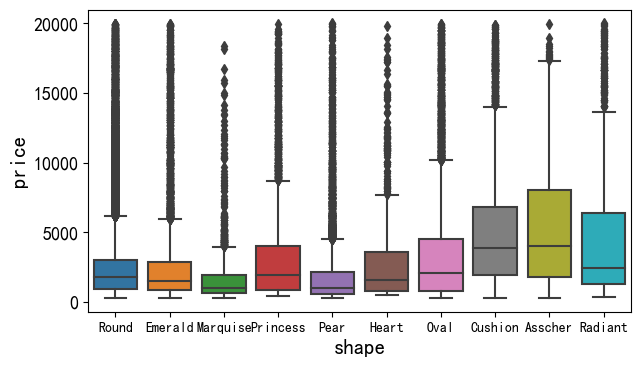

In [141]:
#观察shape与price的关系
D.Dplotout('shape')

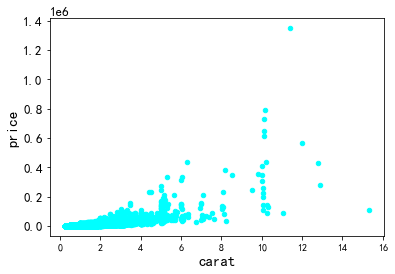

In [25]:
#观察price和carat的关系
D.Dplotout('carat')

float64


<Figure size 700x400 with 0 Axes>

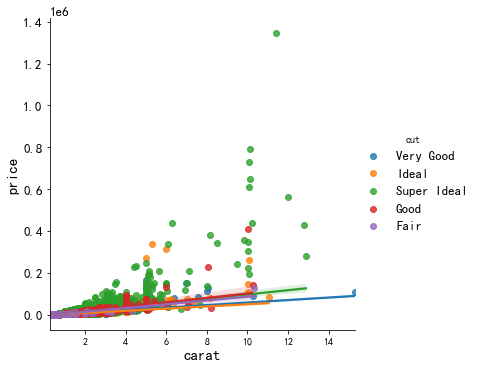

In [26]:
#观察不同cut分类对于price的影响
D.Dplotout('carat','cut')
#不同坐标下各类点大量重合，且拟合直线相近，预估该分类变量对预测影响不大

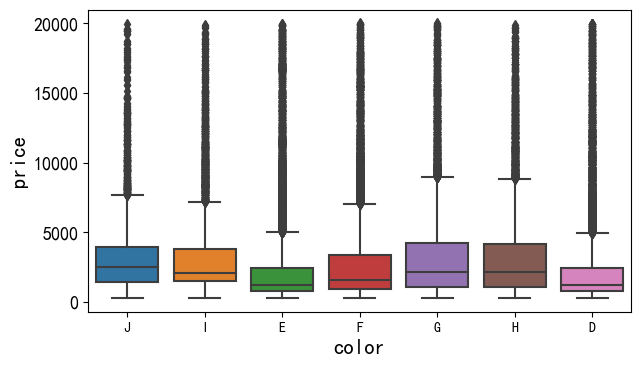

In [27]:
#观察color与price的关系
D.Dplotout('color')

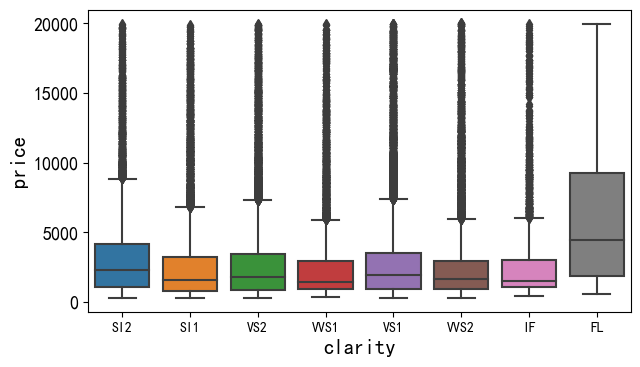

In [28]:
#观察clarity与price的关系
D.Dplotout('clarity')

object


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


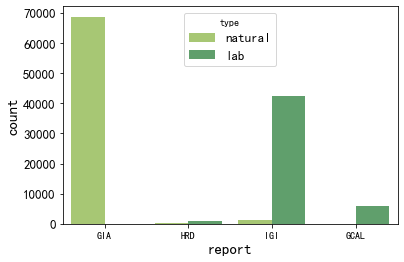

In [29]:
#观测report与变量type的关系
D.Dplotout('report','type')
#GIA钻石认证，一般是自然钻石，其他均为实验室合成的，认为这一条属性和type重合，可以略去

float64


<Figure size 700x400 with 0 Axes>

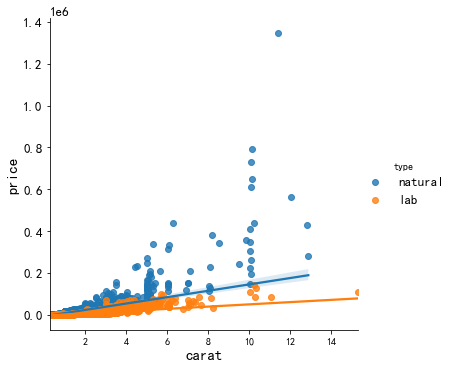

In [30]:
#观察不同type分类对于price的影响
D.Dplotout('carat','type')
#认为natural价位一般高于lab

### 数据预处理

In [150]:
#除去离群点
diamonds=diamonds[diamonds.price<=800000]

In [151]:
diamonds_onehot=pd.get_dummies(diamonds)
diamonds_onehot

,price,carat,shape_Asscher,shape_Cushion,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,report_GCAL,report_GIA,report_HRD,report_IGI,type_lab,type_natural
0,400,0.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,400,0.31,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,400,0.30,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,400,0.30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,400,0.30,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119302,99040,5.71,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
119303,107330,15.32,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
119304,110110,10.05,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
119305,126030,10.33,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0


In [152]:
from sklearn.preprocessing import LabelEncoder
#将分类变量转换为0-(m-1)的数字
class TypeError(Exception):
    pass

f=[]
for column in diamonds.columns:
    try:
        if diamonds[column].dtype == 'O':  # if it's Object dtype
            le = LabelEncoder() 
            diamonds[column] = le.fit_transform(diamonds[column])
            diamonds[column] = diamonds[column].astype('category')
        elif diamonds[column].dtype in ['int64','float64']:
            continue
        else:
            raise TypeError('这个类型不合法！')
    except TypeError as ret:
        print(ret)
    finally:
        f.append((column,diamonds[column].dtype))
for x,y in f:
    print(x,y)

shape category
price int64
carat float64
cut category
color category
clarity category
report category
type category


<ipython-input-152-663e281d0822>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds[column] = le.fit_transform(diamonds[column])
<ipython-input-152-663e281d0822>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds[column] = diamonds[column].astype('category')


In [153]:
diamonds

,shape,price,carat,cut,color,clarity,report,type
0,9,400,0.30,4,6,3,1,1
1,2,400,0.31,2,5,2,1,1
2,2,400,0.30,2,5,5,1,1
3,9,400,0.30,2,5,3,1,1
4,2,400,0.30,2,5,2,1,1
...,...,...,...,...,...,...,...,...
119302,9,99040,5.71,3,0,7,0,0
119303,1,107330,15.32,4,3,3,3,0
119304,1,110110,10.05,2,0,3,3,0
119305,5,126030,10.33,0,0,5,3,0


### Modeling

In [254]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import random
class Model:
    def __init__(self, df, modeltype='Linear', omit_variable=[]):
        '''
        param df : dataframe collecting orignal data
        param modeltype : method that you can choose from 'Linear' or 'RF'
        param omit_variable : drop some variables from the dataset
        return 
        '''
        #根据特殊字段选择模型
        if modeltype == 'RF':
            self.model = RandomForestRegressor()
        elif modeltype == 'Linear':
            self.model = linear_model.LinearRegression(normalize=False)
        self.df = df
        drop_variable=['price']+omit_variable
        self.label = self.df['price']
        self.feature = self.df.drop(drop_variable, axis=1)
        self.X_train, self.X_val, self.Y_train, self.Y_val = train_test_split(self.feature, self.label, test_size=0.3, random_state=42)
        
    #拟合模型
    def fitting(self):
        self.model.fit(self.X_train, self.Y_train)
        
    #一些模型的指标估计
    def evaluate_index(self):
        self.fitting()
        train_Rsquare = self.model.score(self.X_train, self.Y_train)
        test_Rsquare = self.model.score(self.X_val, self.Y_val)
        self.pred = self.model.predict(self.X_val)
        RMSE = np.sqrt(mean_squared_error((self.Y_val),(self.pred)))
        return {'train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'RMSE':RMSE}
    
    #预测值和真实值对比
    def compare(self):
        self.fitting()
        self.pred = self.model.predict(self.X_val)
        index = list(range(len(self.pred)))
        dfnew = pd.DataFrame({'index':index,'Y':self.Y_val,'pred':self.pred})
        #随机获取100个点用于比较拟合结果
        random.seed(2021)
        sample=random.sample(range(0,len(index)),100)
        y=dfnew.iloc[sample,1]
        pred=dfnew.iloc[sample,2]
        plt.scatter(x=sample,y=y,label='y')
        plt.scatter(x=sample,y=pred,label='pred')
        plt.legend()
        plt.show()
        return dfnew
    
    #获取特征重要性
    def feature_importance(self):
        self.fitting()
        self.pred = self.model.predict(self.X_val)
        
        #获取特征的重要性
        #若属于RF分类器，则调用后可以用feature_importances_查看特征重要性
        try:
            #self.model.feature_importances_
            df2=pd.DataFrame({'Feature':self.feature.columns,'importance':list(self.model.feature_importances_)})
        except AttributeError as ret:
            pass
        #若属于线性回归，则可以用model.coef_查看系数
        try:
            df2=pd.DataFrame({'Feature':self.feature.columns,'coefficience':list(self.model.coef_)})
        except AttributeError as ret:
            pass
        return df2

In [236]:
model = Model(diamonds, 'RF')

In [223]:
#评价模型的指标
model.evaluate_index()

{'train_Rsquare': 0.9877634318719198,
 'test_Rsquare': 0.9157486580646307,
 'RMSE': 2806.2477966593374}

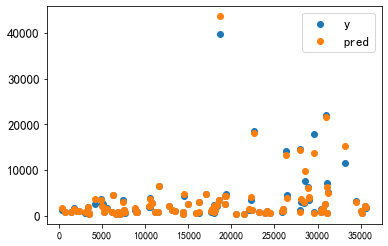

,index,Y,pred
74298,0,390,390.000000
69241,1,18520,15152.260000
27612,2,1220,1452.453413
46748,3,2530,2811.985517
99537,4,2350,2406.646338
...,...,...,...
100871,35787,2510,2415.000000
56149,35788,4090,3895.341667
109403,35789,4160,4108.919714
42627,35790,2210,2216.334401


In [224]:
model.compare()

In [240]:
#给出模型的特征重要性度量
DF=model.feature_importance()

In [253]:
DF.sort_values(by='importance',ascending=False)

,Feature,importance
1,carat,0.693205
6,type,0.120743
4,clarity,0.073273
3,color,0.063513
0,shape,0.022350
5,report,0.021062
2,cut,0.005853


In [255]:
#拟合线性模型
model2 = Model(diamonds, 'Linear',['cut','report'])

In [256]:
#评价模型的指标
model2.evaluate_index()

{'train_Rsquare': 0.48715133295252544,
 'test_Rsquare': 0.4124279851964713,
 'RMSE': 7410.852257783203}

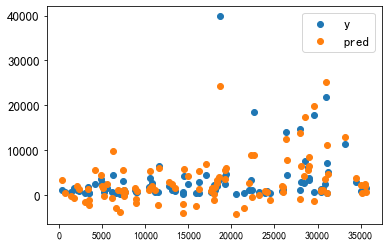

,index,Y,pred
74298,0,390,-2332.727912
69241,1,18520,8517.512286
27612,2,1220,873.727619
46748,3,2530,3684.291877
99537,4,2350,2745.169046
...,...,...,...
100871,35787,2510,3547.521595
56149,35788,4090,5533.673522
109403,35789,4160,8133.912472
42627,35790,2210,1334.393595


In [257]:
model2.compare()

In [258]:
#给出模型的特征重要性度量，对比真实值和预测值
DF2=model2.feature_importance()
print(DF2)

   Feature  coefficience
0    shape    123.639052
1    carat   9015.145594
2    color   -681.887526
3  clarity    136.612880
4     type   4547.952460
